# Анализ исторических данных о продажах видеоигр

### Цель проекта: выявить определяющие успешность игры закономерности.

### Описание проекта:

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В выборке представлены данные до 2016 года, которые содержат информацию
- об играх (наименование, платформа, год выпуска, жанр); 
- их продажах (в млн копий) в различных регионах: Северной Америке, Европе, Японии, а также в остальной части мира;
- об их оценке от критиков, от игроков, а также рейтинг от организации ESRB.

Необходимо изучить эти данные, подготовить их к анализу, подсчитать суммарные продажи во всех регионах, провести исследовательский анализ и проверить следующие гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

### План работы:

1. Загрузка датасета, получение информации о наборе исходных данных.
2. Предобработка данных: устранение недостатков в данных, добавление столбца, содержащего суммарные значения продаж видеоигр во всех регионах.
3. Исследовательский анализ данных:
    - Сколько игр выпускалось в разные годы;
    - Как менялись продажи по платформам;
4. Исследование данных за актуальный период:
    - Какие платформы лидируют по продажам, какие растут, какие падают;
    - Построение и анализ графика «ящик с усами» по глобальным продажам игр в разбивке по платформам;
    - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
    - Общее распределение игр по жанрам;
5. Портрет пользователя каждого региона (самые популярные платформы, жанры, влияние рейтинга ESRB на продажи в каждом регионе).
6. Проверка гипотез.
7. Итоговый вывод.

In [1]:
# Импортируем необхоодимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

### Шаг 1. Загрузка данных и изучение общей информации о них

In [2]:
# Загружаем данные из файла в датафрейм

try:    
    data = pd.read_csv('Downloads/games.csv')
    
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# Изучаем общую информацию о датасете

display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Проверяем данные на наличие пропусков и явных дубликатов

print('Всего явных дубликатов:', data.duplicated().sum())
data.isna().sum()

Всего явных дубликатов: 0


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

###### Вывод:

- В наборе данных 16715 строк, 11 столбцов. Есть пропуски, явные дубликаты отсутствуют. 
- Тип данных в некоторых столбцах (год выпуска, оценка пользователей) стоит изменить.
- Необходимо привести названия столбцов датасета к нижнему регистру

### Шаг 2. Предобработка данных

In [5]:
# Приведем названия столбцов к нижнему регистру

data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Строки, в которых пропущенно название игры, стоит удалить. Их всего две

data = data.dropna(subset = ['name'])

In [7]:
# Обработаем пропуски в столбце 'year_of_release'

print('Всего пропусков:', data['year_of_release'].isna().sum())
print('Доля пропусков от всего объема данных:', np.round(100 * (data['year_of_release'].isna().sum() / len(data['year_of_release'])), 2), '%')

Всего пропусков: 269
Доля пропусков от всего объема данных: 1.61 %


In [8]:
# Так как доля строк с пропущенными значениями в столбце с годом релиза составляет менее двух процентов, их можно удалить

data = data.dropna(subset = ['year_of_release'])

In [9]:
# Меняем тип данных столбца 'year_of_release' на целочисленный

data['year_of_release'] = data['year_of_release'].astype(int)

In [10]:
# Обработаем пропуски в столбце 'critic_score'

print('Всего пропусков:', data['critic_score'].isna().sum())
print('Доля пропусков от всего объема данных', np.round(100 * (data['critic_score'].isna().sum() / len(data['critic_score'])), 2) ,'%')
data['critic_score'].unique()

Всего пропусков: 8461
Доля пропусков от всего объема данных 51.45 %


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [11]:
# Пропущенных значений слишком много, удалять их нельзя, 
# поэтому стоит заполнить пропуски отрицательным числом, чтобы привести значения столбца к целочисленному типу данных

data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'] = data['critic_score'].astype(int)

In [12]:
# Обработаем пропуски в столбце 'user_score'

print('Всего пропусков:', data['user_score'].isna().sum())
print('Доля пропусков от всего объема данных', np.round(100 * (data['user_score'].isna().sum() / len(data['user_score'])), 2) ,'%')
data['user_score'].unique()

Всего пропусков: 6605
Доля пропусков от всего объема данных 40.17 %


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
# Изучим строки, содержащие значение'tbd' в столбце с оценкой пользователей

data[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-1,tbd,E


Аббревиатура 'tbd' расшифровывается как "To Be Determined", то есть "Будет определено". Она означает, что информация по данному вопросу еще не собрана, или результат пока неизвестен. Отсюда следует, что значения 'tbd' можно считать как пропущенные. 

In [14]:
# По аналогии с обработкой пропусков столбца 'critic_score' 
# заполним пропуски отрицательным числом, чтобы привести значения столбца к вещественному типу данных

data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].fillna(-1)
data['user_score'] = data['user_score'].astype(float)
data['user_score'].describe()

count    16444.000000
mean         2.688081
std          4.170124
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

In [15]:
# Изучим пропуски в столбце 'rating'

display(data['rating'].unique())
display(data['rating'].value_counts())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Описание знаков рейтинга:
- Е - Для всех
- Т - Подросткам
- М - Для взрослых
- Е10+ - Для всех от 10 лет и старше
- ЕС - Для детей младшего возраста
- К-А - Для детей и взрослых
- АО - Только для взрослых
- RP - Рейтинг ожидается

In [16]:
# Заполним пропуски значением Unknown

data['rating'] = data['rating'].fillna('Unknown')

In [17]:
# Посмотрим, у какой игры рейтинг RP

data[data['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63,6.8,RP


На данный момент Supreme Ruler: Cold War (2011) имеет рейтинг Е10+, поэтому можно произвести замену значения. 

In [18]:
data['rating'] = data['rating'].replace('RP', 'E10+')

In [19]:
# Посмотрим, у какой игры рейтинг AO

data[data['rating'] == 'AO']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.0,0.09,93,8.6,AO


In [15]:
#data[data['rating'] == 'M'] # - остальные части GTA идут первыми в списке

Релиз GTA: SA на платформе Xbox 2005 года имеет рейтинг АО, в то время как остальные части серии, в том числе и релиз GTA: SA на платформе PS2, имеют рейтинг М. Категории М и АО отличаются незначительно, поэтому рейтинг АО можно заменить на М в рамках нашего исследования. 

In [21]:
data['rating'] = data['rating'].replace('AO', 'M')

In [22]:
# Игры с рейтингом EC и K-A отнесем к категории "для всех", 
# поскольку в игры "для детей и взрослых" и "для детей младшего возраста" можно играть всем

data['rating'] = data['rating'].replace(['EC', 'K-A'], 'E')
display(data['rating'].value_counts())

Unknown    6676
E          3932
T          2905
M          1537
E10+       1394
Name: rating, dtype: int64

In [23]:
# Проверим данные на наличие неявных дубликатов. Для этого создадим отдельный датафрейм, 
# в котором будут содержаться только столбцы с названием, годом релиза и платформой для каждой игры.

data_duplicates = pd.DataFrame(data, columns = ['name', 'platform', 'year_of_release'])

# Выявим дубликаты из нового датафрейма

duplicates = data_duplicates[data_duplicates.duplicated()]
display(duplicates)

,name,platform,year_of_release
16230,Madden NFL 13,PS3,2012


In [24]:
data[data['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,-1,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Как оказалось, "Madden NFL 13", выпущенная на PS3 в 2012 году, встречается в данных дважды. Устраним неявный дубликат, сложив значения суммарных продаж (в строке 604 к сумме продаж в европе нужно прибавить значение из строки 16230).

In [25]:
# Меняем значения и удаляем дубликат

data.loc[604,'eu_sales'] = 0.23

data.loc[16230, 'eu_sales'] = np.NaN
data = data.dropna(subset = ['eu_sales'])

# Проверяем отсутствие дубликата

data[data['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,-1,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75,6.7,E


In [26]:
# Создадим новый столбец, содержащий суммарные значения продаж игры во всех регионах

data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,Unknown,31.38


In [27]:
# Проверка успешной обработки данных

display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


None

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

###### Вывод:

В результате предобработки данных:

- Названия столбцов приведены к нижнему регистру;
- Удалено 269 строк с пропущенными значениями в столбце 'year_of_release';
- Тип данных в столбцах 'year_of_release' и 'user_score' изменен на int и float соответственно; 
- Пропуски в столбцах 'critic_score' и 'user_score' заполнены заглушками в виде отрицательных чисел;
- Пропуски в столбце 'rating' заполнены значением 'Unknown';
- Играм с рейтингами RP, АО, EC и K-A присвоен новый рейтинг, подходящий для исследования;
- В таблицу добавлен новый столбец, содержащий суммарные значения продаж игры во всех регионах;
- Выявлен и устранен неявный дубликат.

После предобработки данных в датасете осталось 16443 строки, 12 столбцов. Можно переходить к исследовательскому анализу данных.

### Шаг 3. Исследовательский анализ данных

##### Сколько игр выпускалось в разные годы

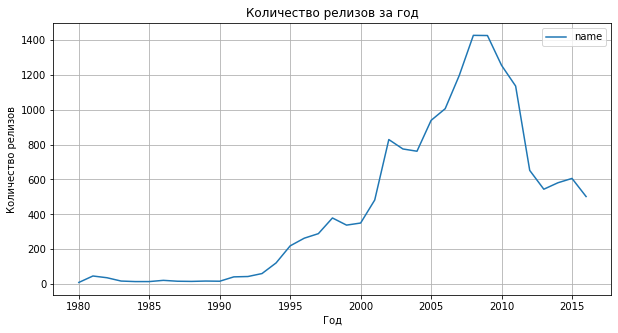

In [28]:
# Для того, чтобы узнать, сколько игр выпускалось в разные годы, создадим сводную таблицу

releases = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

# На основе сводной таблицы построим график

releases.plot(xlabel = 'Год', ylabel = 'Количество релизов', grid = True, figsize = (10, 5))
plt.title('Количество релизов за год')
plt.show()

Судя по графику, количество новинок начало активно расти с начала 1990-х. С развитием индустрии в начале 2000-х наблюдается резкий скачок по количеству релизов. В период с 2003 - 2004 гг число релизов немного упало, однако с 2005 по 2009 выросло в несколько раз. С 2010 года количество релизов начало заметно сокращаться вплоть до наших дней (2016 г). 

#### Как менялись продажи по платформам

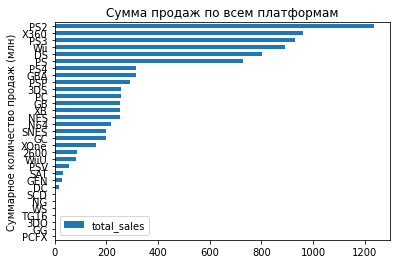

In [29]:
# Посмотрим, как менялись продажи по платформам. Для этого создадим новую сводную таблицу

total_sales = data.pivot_table(index = 'platform', 
                               values = 'total_sales', 
                               aggfunc = 'sum'
                              ).sort_values(by = 'total_sales', 
                                            ascending = True
                                           )

# Построим график

total_sales.plot(kind = 'barh', ylabel = 'Платформа', xlabel = 'Суммарное количество продаж (млн)')
plt.title('Сумма продаж по всем платформам')
plt.show()

На графике сильно выделяются платформы PS2, Xbox 360, PS3, Wii, DS, и PS. Продажи по каждой из них изучим поподробнее.

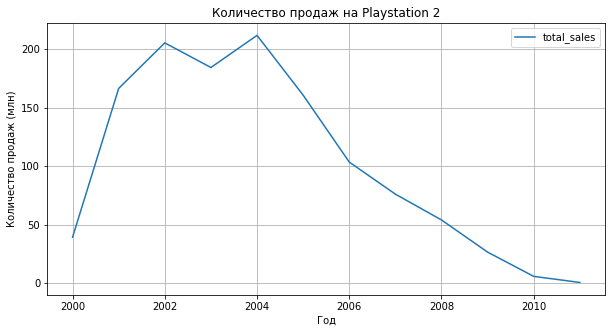

In [30]:
# Распределим по годам продажи на платформе Playstation 2
# Для этого создадим сводную таблицу

ps2_sales = data.query('platform == "PS2"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

# Строим график

ps2_sales.plot(xlabel = 'Год', ylabel = 'Количество продаж (млн)', grid = True, figsize = (10, 5))
plt.title('Количество продаж на Playstation 2')
plt.show()

Игры на PS2 выходили в период с 2000 по 2011 год, пик продаж приходился на 2002 - 2004 годы. Количество релизов заметно сократилось с 2005 года в связи с выходом Playstation 3 в 2006 году. В настоящий момент платформа неактуальна. 

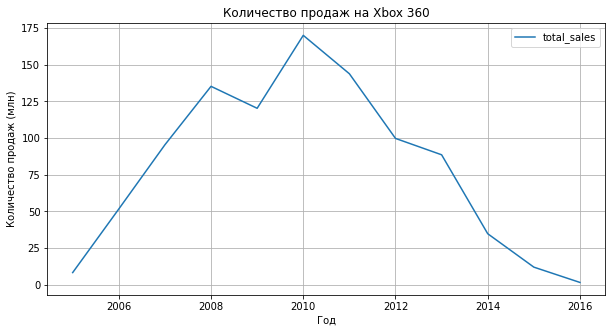

In [31]:
# Распределим по годам продажи на платформе Xbox 360
# Для этого создадим сводную таблицу

x360_sales = data.query('platform == "X360"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

# Строим график

x360_sales.plot(xlabel = 'Год', ylabel = 'Количество продаж (млн)', grid = True, figsize = (10, 5))
plt.title('Количество продаж на Xbox 360')
plt.show()

Игры на Xbox 360 начали продаваться в 2005 году. Количество продаж росло с каждым годом вплоть до 2010, однако после этого число продаж начало заметно сокращаться. После выпуска Xbox One (преемницы Xbox 360) в 2013 году, на данной платформе практически перестали появляться новые игры, и продажи упали до минимума. 

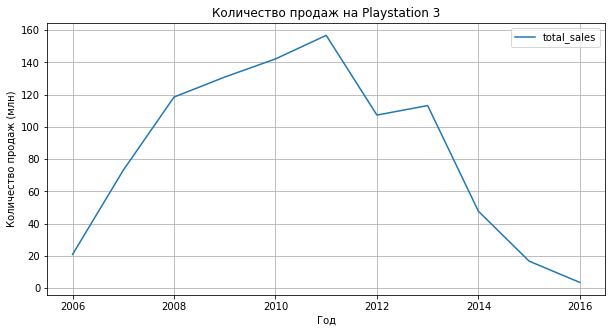

In [32]:
# Распределим по годам продажи на платформе Playstation 3
# Для этого создадим сводную таблицу

ps3_sales = data.query('platform == "PS3"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

# Строим график

ps3_sales.plot(xlabel = 'Год', ylabel = 'Количество продаж (млн)', grid = True, figsize = (10, 5))
plt.title('Количество продаж на Playstation 3')
plt.show()

Игры на PS3 продаются с 2006 года. Пик по продажам приходится на 2011 год. Далее наблюдается значительный спад по продажам, а с момента выпуска консоли следующего поколения в 2014 году PS3 перестала быть актуальной платформой. 

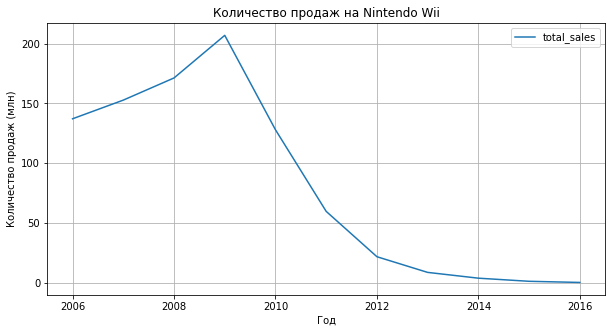

In [33]:
# Распределим по годам продажи на платформе Nintendo Wii
# Для этого создадим сводную таблицу

wii_sales = data.query('platform == "Wii"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

# Строим график

wii_sales.plot(xlabel = 'Год', ylabel = 'Количество продаж (млн)', grid = True, figsize = (10, 5))
plt.title('Количество продаж на Nintendo Wii')
plt.show()

Игры для Nintendo Wii начали продаваться в 2006 году, 2009 год - пик продаж игр для данной платформы. С 2010 года продажи начали падать. После того, как в 2013 году поддержка платформы была прекращена, количество продаж сократились до минимума. На данный момент платформа не является актуальной.  

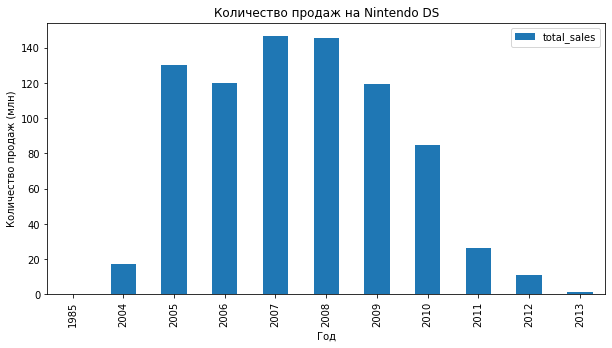

In [34]:
# Распределим по годам продажи на платформе Nintendo DS
# Для этого создадим сводную таблицу

ds_sales = data.query('platform == "DS"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

# Строим график

ds_sales.plot(kind = 'bar', xlabel = 'Год', ylabel = 'Количество продаж (млн)', grid = False, figsize = (10, 5))
plt.title('Количество продаж на Nintendo DS')
plt.show()

Игры на Nintendo DS начали продаваться в 2004 году. Количество продаж достигло пика в 2007 году. С 2008 года число продаж начало сокращаться, а после 2013 года продажи окончательно прекратились. На сегодняшний день платформа неактуальна.  

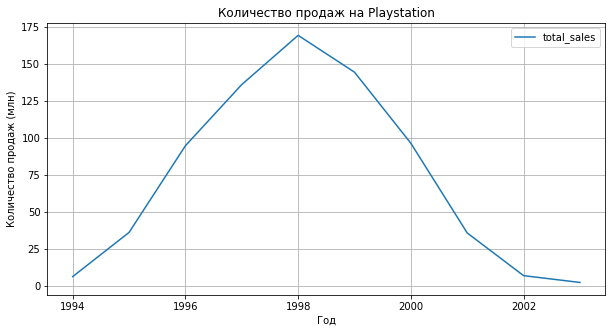

In [35]:
# Распределим по годам продажи на платформе Playstation
# Для этого создадим сводную таблицу

ps_sales = data.query('platform == "PS"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

# Строим график

ps_sales.plot(xlabel = 'Год', ylabel = 'Количество продаж (млн)', grid = True, figsize = (10, 5))
plt.title('Количество продаж на Playstation')
plt.show()

Игры на PS продавались в период с 1994 по 2003 год. Пик по количеству продаж приходится на 1998 год. Продажи резко сократились с 2000 года, после 2003 года продажи прекратились. Платформа не является актуальной на данный момент. 

#### Исследование данных за актуальный период

В результате исследования количества релизов и общих продаж видеоигр, можно сделать вывод о том, что пик продаж в среднем приходится спустя 3-4 года после выпуска консоли. Это значит, что данные за период с 2014 года помогут построить прогноз на 2017 год, поэтому будем считать этот период актуальным. 

In [36]:
# Создаем новый датафрейм, в котором будут храниться данные за актуальный период

actual_data = data.query('year_of_release >= 2014')

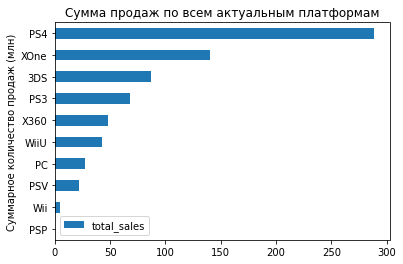

In [37]:
# Узнаем, какие платформы лидируют по продажам, какие растут, какие падают
# Для этого создаем сводную таблицу

actual_platforms = actual_data.pivot_table(index = 'platform', 
                                           values = 'total_sales', 
                                           aggfunc = 'sum'
                                          ).sort_values(by = 'total_sales', 
                                                        ascending = True
                                                       )

# Построим график

actual_platforms.plot(kind = 'barh', ylabel = 'Платформа', xlabel = 'Суммарное количество продаж (млн)')
plt.title('Сумма продаж по всем актуальным платформам')
plt.show()

Судя по графику, самые популярные платформы на данный момент - PS4, Xbox One, и Nintendo 3DS. Далее распределим по годам и изучим продажи игр для этих платформ. PS3 и Xbox 360 не берем для дальнейшего исследования, поскольку это платформы прошлого поколения.

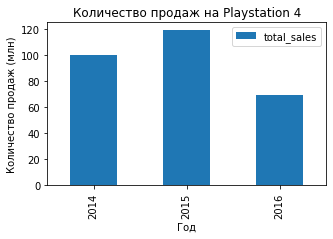

In [38]:
# Продажи по годам для PS4

ps4_sales = actual_data.query('platform == "PS4"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

ps4_sales.plot(kind = 'bar', xlabel = 'Год', ylabel = 'Количество продаж (млн)', grid = False, figsize = (5, 3))
plt.title('Количество продаж на Playstation 4')
plt.show()

По данным графика видно, что количество продаж находится на высоком уровне. Учитывая, что данные за 2016 год неполные (впереди осень), можно сказать, что продажи растут и еще будут расти.

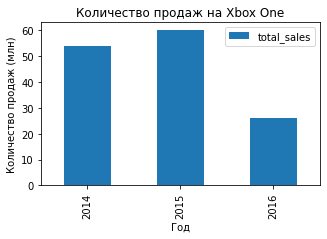

In [39]:
# Продажи по годам для Xbox One

xone_sales = actual_data.query('platform == "XOne"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

xone_sales.plot(kind = 'bar', xlabel = 'Год', ylabel = 'Количество продаж (млн)', grid = False, figsize = (5, 3))
plt.title('Количество продаж на Xbox One')
plt.show()

Суммарное количество проданных копий игр на Xbox One намного ниже по сравнению с PS4, но на графике видно, что с каждым годом продажи растут. 

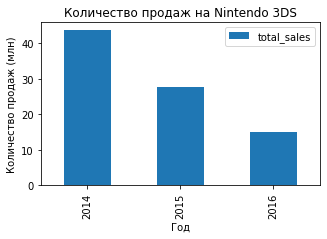

In [40]:
# Продажи по годам для Nintendo 3DS

n3ds_sales = actual_data.query('platform == "3DS"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

n3ds_sales.plot(kind = 'bar', xlabel = 'Год', ylabel = 'Количество продаж (млн)', grid = False, figsize = (5, 3))
plt.title('Количество продаж на Nintendo 3DS')
plt.show()

На графике видно, что продажи игр для платформы Nintendo 3DS с 2014 года начали сокращаться. Сложно сказать, будет ли в 2016 году продано больше копий, чем в 2015. 

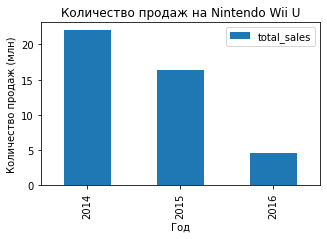

In [41]:
# Продажи по годам для Nintendo Wii U

wiiu_sales = actual_data.query('platform == "WiiU"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

wiiu_sales.plot(kind = 'bar', xlabel = 'Год', ylabel = 'Количество продаж (млн)', grid = False, figsize = (5, 3))
plt.title('Количество продаж на Nintendo Wii U')
plt.show()

У Wii U ситуация аналогичная с 3DS, только количество продаж в два раза меньше. Очевидно, пик популярности обоих консолей уже прошел.

По результатам анализа, потенциально прибыльными платформами для продажи видеоигр являются Playstation 4 и Xbox One. Продажи игр на Nintendo 3DS и Wii U падают с 2014 года. Остальные платформы (кроме PC) не являтся актуальными, их популярность уже не вырастет. 

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

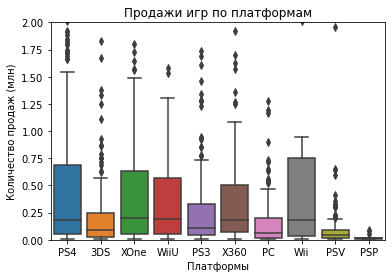

In [42]:
# Построим график

sns.boxplot(data = actual_data,
            x = 'platform',
            y = 'total_sales'
           ).set(title = 'Продажи игр по платформам',
                 xlabel = 'Платформы',
                 ylabel = 'Количество продаж (млн)',
                  ylim = (0, 2) # для понятного масштаба
                )
plt.show()

In [43]:
# Создадим сводную таблицу, в которой содержатся среднее значение и медиана продаж каждой игры на каждой актуальной платформе

actual_platform_sales = actual_data.pivot_table(index = 'platform',
                                                values = 'total_sales',
                                                aggfunc = ['mean', 'median']
                                               )

# Переименуем названия столбцов
actual_platform_sales.columns = ['total_mean', 'total_median']
display(actual_platform_sales.sort_values(by = 'total_median', ascending = False))

,total_mean,total_median
platform,,
XOne,0.615614,0.205
WiiU,0.588767,0.190
PS4,0.766356,0.185
Wii,0.460909,0.180
X360,0.434414,0.180
PS3,0.311324,0.110
3DS,0.408868,0.090
PC,0.179139,0.060
PSV,0.075932,0.040


Изучив график и сводную таблицу, можно сделать несколько выводов:

   - У трех самых популярных на данный момент платформ медианы продаж имеют примерно равные значения. Самое высокое значение медианы у Xbox One (0.205 млн копий)
   - Средние значения трех самых популярных платформ также примерно равны. Самое высокое среднее значение у PS4 (0.766356)
   - График «ящик с усами» подтверждает, что самыми популярными платформами на сегодняшний день являются PS4, Xbox One и Nintendo WiiU
    

#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [44]:
# Посчитаем коэффициент корреляции между отзывами и продажами для платформы PS4

ps4_critic_data = actual_data.query('platform == "PS4"')
ps4_critic_data = ps4_critic_data[ps4_critic_data['critic_score'] != -1]

ps4_user_data = actual_data.query('platform == "PS4"')
ps4_user_data = ps4_user_data[ps4_user_data['user_score'] != -1]

print('Коэффициент корреляции между оценками критиков и продажами равен', ps4_critic_data['total_sales'].corr(ps4_critic_data['critic_score']))
print('Коэффициент корреляции между отзывами пользователей и продажами равен', ps4_user_data['total_sales'].corr(ps4_user_data['user_score']))


Коэффициент корреляции между оценками критиков и продажами равен 0.40266141068104083
Коэффициент корреляции между отзывами пользователей и продажами равен -0.040131589472697356


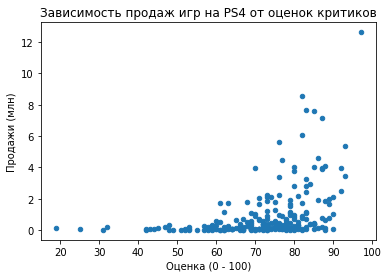

In [45]:
# Построим диаграммы рассеяния

ps4_critic_data.plot(kind = 'scatter',
                     x = 'critic_score', 
                    y = 'total_sales',
                    xlabel = 'Оценка (0 - 100)',
                    ylabel = 'Продажи (млн)'
                    )
plt.title('Зависимость продаж игр на PS4 от оценок критиков')
plt.show()

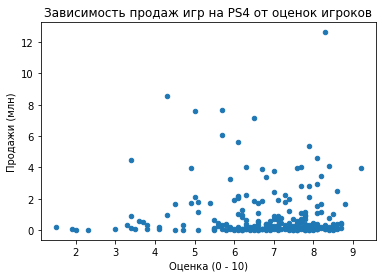

In [46]:
ps4_user_data.plot(kind = 'scatter',
                     x = 'user_score', 
                    y = 'total_sales',
                    xlabel = 'Оценка (0 - 10)',
                    ylabel = 'Продажи (млн)'
                    )
plt.title('Зависимость продаж игр на PS4 от оценок игроков')
plt.show()

В результате вычисления кофэффициентов корреляции и анализа диаграмм можно сделать следующие выводы:
   - Оценки критиков слабо влияют на продажи игр на PS4 (коэффициент меньше 0.5)
   - Количество продаж игр на PS4 не зависит от оценок игроков

In [47]:
# Далее посчитаем коэффициент корреляции между отзывами и продажами для платформы Xbox One

xone_critic_data = actual_data.query('platform == "XOne"')
xone_critic_data = xone_critic_data[xone_critic_data['critic_score'] != -1]

xone_user_data = actual_data.query('platform == "XOne"')
xone_user_data = xone_user_data[xone_user_data['user_score'] != -1]

print('Коэффициент корреляции между оценками критиков и продажами равен', xone_critic_data['total_sales'].corr(xone_critic_data['critic_score']))
print('Коэффициент корреляции между отзывами пользователей и продажами равен', xone_user_data['total_sales'].corr(xone_user_data['user_score']))

Коэффициент корреляции между оценками критиков и продажами равен 0.42867694370333226
Коэффициент корреляции между отзывами пользователей и продажами равен -0.0703839280647581


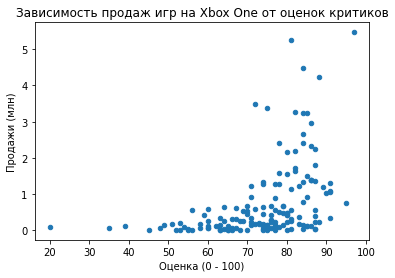

In [48]:
# Построим диаграммы рассеяния

xone_critic_data.plot(kind = 'scatter',
                     x = 'critic_score', 
                    y = 'total_sales',
                    xlabel = 'Оценка (0 - 100)',
                    ylabel = 'Продажи (млн)'
                    )
plt.title('Зависимость продаж игр на Xbox One от оценок критиков')
plt.show()

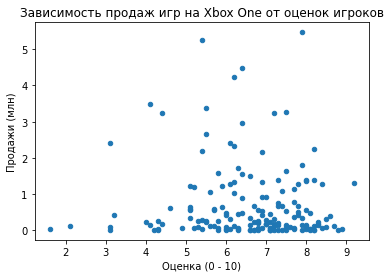

In [49]:
xone_user_data.plot(kind = 'scatter',
                     x = 'user_score', 
                    y = 'total_sales',
                    xlabel = 'Оценка (0 - 10)',
                    ylabel = 'Продажи (млн)'
                    )
plt.title('Зависимость продаж игр на Xbox One от оценок игроков')
plt.show()

В результате вычисления кофэффициентов корреляции и анализа диаграмм можно сделать следующие выводы:
   - Оценки критиков слабо влияют на продажи игр на Xbox One (коэффициент меньше 0.5)
   - Количество продаж игр на Xbox one не зависит от оценок игроков

In [50]:
# Далее посчитаем коэффициент корреляции между отзывами и продажами для платформы Nintendo WiiU

wiiu_critic_data = actual_data.query('platform == "WiiU"')
wiiu_critic_data = wiiu_critic_data[wiiu_critic_data['critic_score'] != -1]

wiiu_user_data = actual_data.query('platform == "WiiU"')
wiiu_user_data = wiiu_user_data[wiiu_user_data['user_score'] != -1]

print('Коэффициент корреляции между оценками критиков и продажами равен', wiiu_critic_data['total_sales'].corr(wiiu_critic_data['critic_score']))
print('Коэффициент корреляции между отзывами пользователей и продажами равен', wiiu_user_data['total_sales'].corr(wiiu_user_data['user_score']))


Коэффициент корреляции между оценками критиков и продажами равен 0.370201412480884
Коэффициент корреляции между отзывами пользователей и продажами равен 0.4079264579217078


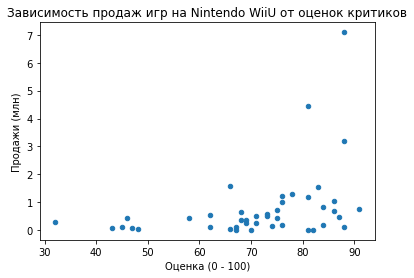

In [51]:
# Построим диаграммы рассеяния

wiiu_critic_data.plot(kind = 'scatter',
                     x = 'critic_score', 
                    y = 'total_sales',
                    xlabel = 'Оценка (0 - 100)',
                    ylabel = 'Продажи (млн)'
                    )
plt.title('Зависимость продаж игр на Nintendo WiiU от оценок критиков')
plt.show()

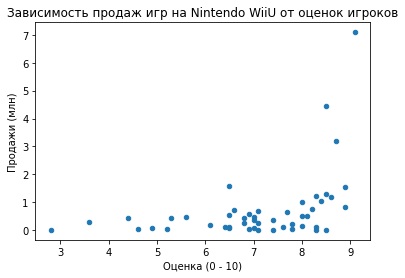

In [52]:
wiiu_user_data.plot(kind = 'scatter',
                     x = 'user_score', 
                    y = 'total_sales',
                    xlabel = 'Оценка (0 - 10)',
                    ylabel = 'Продажи (млн)'
                    )
plt.title('Зависимость продаж игр на Nintendo WiiU от оценок игроков')
plt.show()

В результате вычисления кофэффициентов корреляции и анализа диаграмм можно сделать следующие выводы:
   - Оценки критиков слабо влияют на продажи игр на Nintendo WiiU (коэффициент 0.37)
   - Оценки игроков слабо влияют на продажи игр на Nintendo WiiU (коэффициент 0.4)
   - Оценки игроков влияют на продажи игр на Nintendo WiiU сильнее, чем оценки критиков

#### Вывод:

Исходя из оценок коэффициентов корреляции и анализа диаграмм рассеяния, можно сказать, что объем продаж видеоигр очень слабо зависит от оценок критиков и практически не зависит от оценок игроков.

#### Общее распределение игр по жанрам

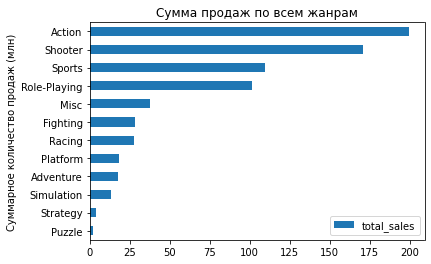

In [53]:
# Построим график распределения игр по жанрам
# Для этого создаем сводную таблицу

genres_data = actual_data.pivot_table(index = 'genre', 
                                      values = 'total_sales', 
                                      aggfunc = 'sum'
                                     ).sort_values(by = 'total_sales',
                                                   ascending = True
                                                  )

genres_data.plot(kind = 'barh', ylabel = 'Жанр', xlabel = 'Суммарное количество продаж (млн)')
plt.title('Сумма продаж по всем жанрам')
plt.show()

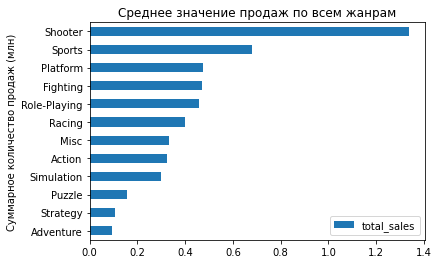

In [54]:
# Теперь посмотрим на средние и медианные значения продаж по каждому жанру

genres_data_mean = actual_data.pivot_table(index = 'genre', 
                                      values = 'total_sales', 
                                      aggfunc = 'mean'
                                     ).sort_values(by = 'total_sales',
                                                   ascending = True
                                                  )

genres_data_mean.plot(kind = 'barh', ylabel = 'Жанр', xlabel = 'Суммарное количество продаж (млн)')
plt.title('Среднее значение продаж по всем жанрам')
plt.show()

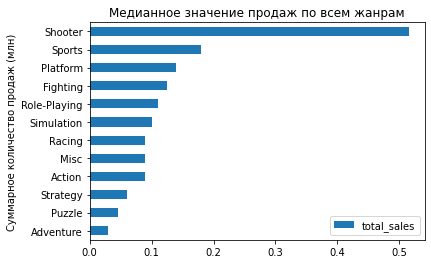

In [55]:
genres_data_median = actual_data.pivot_table(index = 'genre', 
                                      values = 'total_sales', 
                                      aggfunc = 'median'
                                     ).sort_values(by = 'total_sales',
                                                   ascending = True
                                                  )

genres_data_median.plot(kind = 'barh', ylabel = 'Жанр', xlabel = 'Суммарное количество продаж (млн)')
plt.title('Медианное значение продаж по всем жанрам')
plt.show()

#### Вывод:

Судя по графикам, самые прибыльные жанры видеоигр - экшен (около 200 млн), шутеры (около 175 млн), спортивные симуляторы (около 110 млн) и РПГ (около 100 млн). Наименее популярные жанры видеоигр - стратегии и головоломки (менее 10 млн копий).
При этом стоит отметить, что в среднем самые продаваемые жанры игр - шутеры (с огромным отрывом от остальных), спортивные симуляторы, платформеры, файтинги и РПГ. Получается, что большую часть общих продаж игр жанра Action составляют продажи игр-бестселлеров, а шутеры стабильно пользуются огромной популярностью. 

### Шаг 4. Портрет пользователя каждого региона (NA, EU, JP)

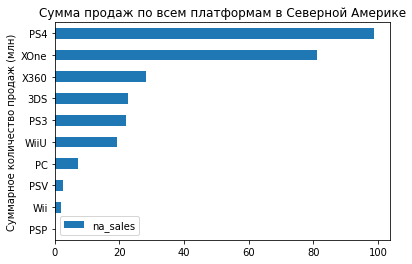

In [56]:
# Определим для пользователя каждого региона самые популярные платформы, жанры и рейтинги игр
# Начнем с региона Северная Америка

# Составим сводные таблицы для построения графиков

platform_na = actual_data.pivot_table(index = 'platform', 
                                      values = 'na_sales', 
                                      aggfunc = 'sum'
                                     ).sort_values(by = 'na_sales',
                                                   ascending = True
                                                  )

genre_na = actual_data.pivot_table(index = 'genre', 
                                      values = 'na_sales', 
                                      aggfunc = 'sum'
                                     ).sort_values(by = 'na_sales',
                                                   ascending = True
                                                  )

rating_na = actual_data.pivot_table(index = 'rating', 
                                      values = 'na_sales', 
                                      aggfunc = 'sum'
                                     ).sort_values(by = 'na_sales',
                                                   ascending = True
                                                  )


platform_na.plot(kind = 'barh', ylabel = 'Платформа', xlabel = 'Суммарное количество продаж (млн)')
plt.title('Сумма продаж по всем платформам в Северной Америке')
plt.show()

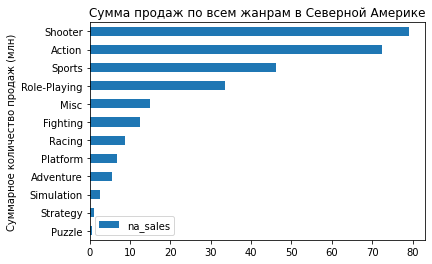

In [57]:
genre_na.plot(kind = 'barh', ylabel = 'Жанр', xlabel = 'Суммарное количество продаж (млн)')
plt.title('Сумма продаж по всем жанрам в Северной Америке')
plt.show()

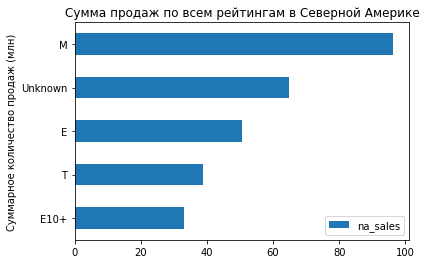

In [58]:
rating_na.plot(kind = 'barh', ylabel = 'Рейтинг', xlabel = 'Суммарное количество продаж (млн)')
plt.title('Сумма продаж по всем рейтингам в Северной Америке')
plt.show()

#### Портрет пользователя региона Северная Америка:

- Среди американских игроков самой популярной платформой является Playstation 4. На втором по популярности месте находится Xbox One. Эти платформы сильно отрываются от остальных по популярности в данном регионе.
- Самые популярные жанры среди американских игроков - шутер и экшен. Далее следуют спортивные симуляторы и РПГ.
- Самый популярный рейтинг игр среди американских игроков - рейтинг M (для взрослых). На втором месте по популярности неизвестный жанр, далее идут игры "для всех"

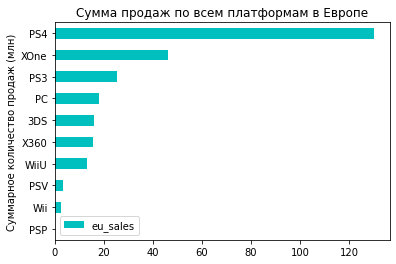

In [59]:
# Далее определим самые популярные платформы, жанры и рейтинги игр для игроков из Европы

# Составим сводные таблицы для построения графиков

platform_eu = actual_data.pivot_table(index = 'platform', 
                                      values = 'eu_sales', 
                                      aggfunc = 'sum'
                                     ).sort_values(by = 'eu_sales',
                                                   ascending = True
                                                  )

genre_eu = actual_data.pivot_table(index = 'genre', 
                                      values = 'eu_sales', 
                                      aggfunc = 'sum'
                                     ).sort_values(by = 'eu_sales',
                                                   ascending = True
                                                  )

rating_eu = actual_data.pivot_table(index = 'rating', 
                                      values = 'eu_sales', 
                                      aggfunc = 'sum'
                                     ).sort_values(by = 'eu_sales',
                                                   ascending = True
                                                  )


platform_eu.plot(kind = 'barh', ylabel = 'Платформа', xlabel = 'Суммарное количество продаж (млн)', color = 'c')
plt.title('Сумма продаж по всем платформам в Европе')
plt.show()

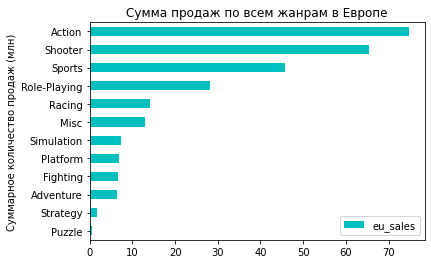

In [60]:
genre_eu.plot(kind = 'barh', ylabel = 'Жанр', xlabel = 'Суммарное количество продаж (млн)', color = 'c')
plt.title('Сумма продаж по всем жанрам в Европе')
plt.show()

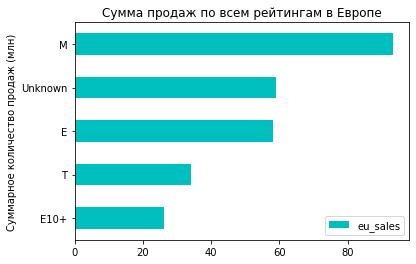

In [61]:
rating_eu.plot(kind = 'barh', ylabel = 'Рейтинг', xlabel = 'Суммарное количество продаж (млн)', color = 'c')
plt.title('Сумма продаж по всем рейтингам в Европе')
plt.show()

#### Портрет пользователя региона Европа:

- Среди европейских игроков наиболее популярной платформой является Playstation 4. На втором по популярности месте находится Xbox One.
- Самые популярные жанры среди европейских игроков - экшен и шутер. Далее идут спортивные симуляторы и РПГ.
- Самый популярный рейтинг игр среди американских игроков - рейтинг M (для взрослых). На втором месте по популярности неизвестный жанр, далее идут игры "для всех"

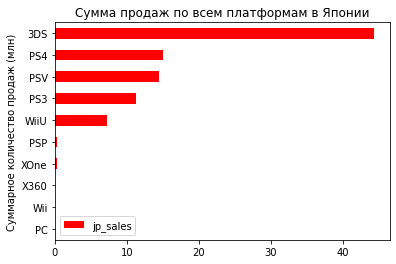

In [62]:
# Определим самые популярные платформы, жанры и рейтинги игр для игроков из Японии

# Составим сводные таблицы для построения графиков

platform_jp = actual_data.pivot_table(index = 'platform', 
                                      values = 'jp_sales', 
                                      aggfunc = 'sum'
                                     ).sort_values(by = 'jp_sales',
                                                   ascending = True
                                                  )

genre_jp = actual_data.pivot_table(index = 'genre', 
                                      values = 'jp_sales', 
                                      aggfunc = 'sum'
                                     ).sort_values(by = 'jp_sales',
                                                   ascending = True
                                                  )

rating_jp = actual_data.pivot_table(index = 'rating', 
                                      values = 'jp_sales', 
                                      aggfunc = 'sum'
                                     ).sort_values(by = 'jp_sales',
                                                   ascending = True
                                                  )


platform_jp.plot(kind = 'barh', ylabel = 'Платформа', xlabel = 'Суммарное количество продаж (млн)', color = 'r')
plt.title('Сумма продаж по всем платформам в Японии')
plt.show()

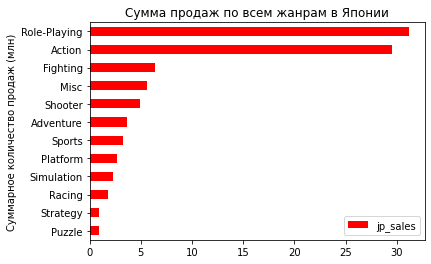

In [63]:
genre_jp.plot(kind = 'barh', ylabel = 'Жанр', xlabel = 'Суммарное количество продаж (млн)', color = 'r')
plt.title('Сумма продаж по всем жанрам в Японии')
plt.show()

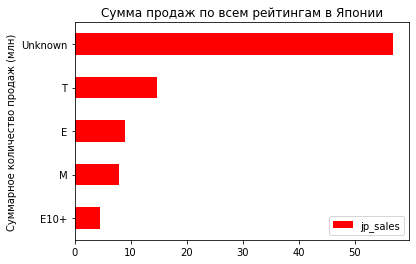

In [64]:
rating_jp.plot(kind = 'barh', ylabel = 'Рейтинг', xlabel = 'Суммарное количество продаж (млн)', color = 'r')
plt.title('Сумма продаж по всем рейтингам в Японии')
plt.show()

#### Портрет пользователя региона Япония:

- Среди японских игроков наиболее популярной платформой является Nintendo 3DS. На втором по популярности месте находится Playstation 4.
- Самые популярные жанры среди японских игроков - РПГ и экшен. Далее идут файтинги и misc.
- Самые популярные игры среди японских пользователей относятся к категории с неизвестным рейтингом - Unknown. На втором месте по популярности игры для подростков, далее идут игры "для всех".

#### Вывод:

Предпочтения игроков из Северной Америки в целом не сильно отличаются от предпочтений европейских игроков:
- самая популярная платформа для обоих регионов - PS4;
- самые популярные жанры - экшен и шутер;
- самый популярный рейтинг - M (для взрослых).



Игроки из японии очень сильно отличаются от пользователей из Северной Америки и Европы:
- Самая популярная платформа - Nintendo 3DS. PS4 очень сильно позади, а Xbox One в Японии вообще не пользуется популярностью.
- Самый популярный жанр - РПГ;
- Самый популярный рейтинг - Unknown (игры с неизвестным рейтингом).

Таким образом, при планировании рекламных кампаний, обязательно следует учитывать такую сильную разницу в предпочтениях игроков из разных регионов. Единственное, что в равной степени популярно среди игроков всех регионов - жанр Action.

### Шаг 5. Проверка гипотез

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза - это предположение о том, что не существует значимых различий между двумя наблюдаемыми событиями. Альтернативная гипотеза - противоположность нулевой, соответственно:

- **Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- **Альтернативная гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

Так как мы проверяем неравенство, гипотеза является двусторонней. Для проверки двусторонней гипотезы о равенстве среднего двух независимых генеральных совокупностей (по взятым из них выборкам) в Python есть специальный метод st.ttest_ind().

In [65]:
# Перед проверкой нулевой гипотезы исключаем из данных пропуски, заполненные отрицательными значениями
# Создаем новый датафрейм без отрицательных щначений

actual_data_plus = actual_data[actual_data['user_score'] != -1]

# Проверяем нулевую гипотезу

alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(actual_data_plus.query('platform == "XOne"')['user_score'], actual_data_plus.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.10450507919348415
Не отвергаем нулевую гипотезу


**Вывод:** результат проверки показал, что p-value выше уровня статистической значимости. Это означает, что отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, мы не можем.

##### Средние пользовательские рейтинги жанров Action и Sports разные

- **Нулевая гипотеза:** cредние пользовательские рейтинги жанров Action и Sports не отличаются.
- **Альтернативная гипотеза:** cредние пользовательские рейтинги жанров Action и Sports отличаются.

In [66]:
# Проверяем нулевую гипотезу

alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(actual_data_plus.query('genre == "Action"')['user_score'], actual_data_plus.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Вывод:** результат проверки показал, что p-value слишком мало, поэтому нулевую гипотезу нужно отвергуть. Вероятнее всего, cредние пользовательские рейтинги жанров Action и Sports отличаются.

## Итоговый вывод

### В результате выполнения проекта:

- Изучена общая информация о первичных данных: набор данных из 16715 строк и 11 столбцов содержит информацию об играх, их продажах в различных регионах (Северная Америка, Европа, Япония и остальной мир), а также об их оценке (критиков и игроков) и рейтинге от организации ESRB.

- В результате предобработки данных недостатки были выявлены и устранены, а значения в столбцах были приведены к необходимым типам данных. В датасет был добавлен новый столбец с подсчитанными значениями суммарных продаж видеоигр во всех регионах.

- Проведен исследовательский анализ данных, на основании которого можно сделать следующие выводы:

    - Количество игровых новинок начало активно расти с начала 1990-х. С развитием индустрии в начале 2000-х наблюдается резкий скачок по количеству релизов. В период с 2003 - 2004 гг число релизов немного упало, однако с 2005 по 2009 гг выросло в несколько раз. С 2010 года количество релизов начало заметно сокращаться вплоть до наших дней;
    - На данный момент платформами с наибольшими суммарными продажами являются (в порядке убывания) PS2, Xbox 360, PS3, Wii, DS, и PS. В среднем "цикл жизни" платформы составляет около 10 лет, а пик продаж в среднем приходится спустя 3-4 года после её выпуска.

- Исследование данных за актуальный период привело к следующим результатам:

    - Самые популярные платформы на данный момент - PS4, Xbox One, и Nintendo 3DS;
    - Потенциально прибыльными платформами для продажи видеоигр являются Playstation 4 и Xbox One. Продажи игр на Nintendo 3DS и Wii U падают с 2014 года;
    - Изучив график "ящик с усами" по глобальным продажам игр в разбивке по платформам, а также сводную таблицу, можно сделать несколько выводов:

        - У трех самых популярных на данный момент платформ медианы продаж имеют примерно равные значения. Самое высокое значение медианы у Xbox One (0.205 млн копий);
        - Средние значения трех самых популярных платформ также примерно равны. Самое высокое среднее значение у PS4 (0.766356);
        - График «ящик с усами» подтверждает, что самыми популярными платформами на сегодняшний день являются PS4, Xbox One и Nintendo WiiU.

    - Исходя из оценок коэффициентов корреляции и анализа диаграмм рассеяния, можно сказать, что объем продаж видеоигр очень слабо зависит от оценок критиков и практически не зависит от оценок игроков;
    - Самые прибыльные жанры видеоигр - экшен (около 200 млн), шутеры (около 175 млн), спортивные симуляторы (около 110 млн) и РПГ (около 100 млн). Большую часть общих продаж игр жанра Action составляют продажи игр-бестселлеров, а шутеры стабильно пользуются огромной популярностью. Наименее популярные жанры видеоигр - стратегии и головоломки (менее 10 млн копий);

- Составлены следующие портреты  пользователей каждого региона:

    - Портрет пользователя региона Северная Америка:
    
        - Среди американских игроков самой популярной платформой является Playstation 4. На втором по популярности месте находится Xbox One. Эти платформы сильно отрываются от остальных по популярности в данном регионе;
        - Самые популярные жанры среди американских игроков - шутер и экшен. Далее следуют спортивные симуляторы и РПГ;
        - Самый популярный рейтинг игр среди американских игроков - рейтинг M (для взрослых). На втором месте по популярности неизвестный жанр, далее идут игры "для всех".
        
    - Портрет пользователя региона Европа:

        - Среди европейских игроков наиболее популярной платформой является Playstation 4. На втором по популярности месте находится Xbox One;
        - Самые популярные жанры среди европейских игроков - экшен и шутер. Далее идут спортивные симуляторы и РПГ;
        - Самый популярный рейтинг игр среди американских игроков - рейтинг M (для взрослых). На втором месте по популярности неизвестный жанр, далее идут игры "для всех".
        
    -  Портрет пользователя региона Япония:
     
        - Среди японских игроков наиболее популярной платформой является Nintendo 3DS. На втором по популярности месте находится Playstation 4;
        - Самые популярные жанры среди японских игроков - РПГ и экшен. Далее идут файтинги и misc;
        - Самые популярные игры среди японских пользователей относятся к категории с неизвестным рейтингом - Unknown. На втором месте по популярности игры для подростков, далее идут игры "для всех";

- Проведена проверка следующих гипотез:    

    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    2. Средние пользовательские рейтинги жанров Action и Sports разные.
    
- Результат проверки гипотез:

    1. Отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, мы не можем.
    2. Вероятнее всего, cредние пользовательские рейтинги жанров Action и Sports отличаются.

**На основании проведенного исследования и проверки гипотез, можно сделать несколько главных выводов:**

1. С 2010 года количество релизов начало заметно сокращаться;

2. Самые популярные платформы на данный момент (2016 год) - PS4, Xbox One, и Nintendo 3DS; 

3. Объем продаж видеоигр зависит от жанра, рейтинга и платформы: 

    - Самые продаваемые жанры видеоигр (по убыванию) - Action, Shooter, Sports и RPG. Однако игры жанров Shooter и Sports продаются в среднем стабильно на высоком уровне, чего нельзя сказать про жанр Action;
    - Самые продаваемые игры в Северной Америке и Европе имеют рейтинг M (для взрослых), а в Японии наиболее продаваемые игры имеют рейтинг Unknown;
    - Наибольший объем продаж видеоигр на платформах PS4 и Xbox One (в NA и EU), а также Nintendo 3DS (в JP);
    - Объем продаж видеоигры очень слабо зависит от оценок критиков и практически не зависит от оценок игроков;
    
4. Предпочтения игроков из Северной Америки в целом не сильно отличаются от предпочтений европейских игроков, а игроки из японии очень сильно отличаются от пользователей из Северной Америки и Европы. Например, PS4 и Xbox One - самые популярные платформы в Северной Америке и Европе, а Nintendo 3DS - в Японии. При этом очень важно отметить, что в Японии Xbox One вообще не пользуется популярностью. Также, к примеру, самые популярные жанры в Европе и Северной Америке - шутеры и экшен, в то время как в Японии огромной популярностью пользуются жанры RPG и экшен. Вообще, жанр Action, пожалуй, еинственное, что в равной степени популярно среди игроков всех регионов. Именно поэтому при планировании рекламных кампаний очень важно учитывать такую сильную разницу в предпочтениях игроков из разных регионов.

В дальнейшем имеет смысл дополнить датасет и проверить следующие гипотезы:
   1. Среднее значение продаж кроссплатформенных видеоигр больше по сравнению с играми-эксклюзивами. 
   2. Среднее значение продаж многопользовательских видеоигр больше по сравнению с одиночными играми.